In [1]:
import yellowcab

In [2]:
trip_data = yellowcab.io.read_all_files('parquet')

# Feature Engineering

Test which feature might be good for different regression model.
Check correlation matrix between features.

## trip_distance

In [3]:
drop = ['tpep_pickup_datetime', 'tpep_dropoff_datetime', 'DOLocationID', 'RatecodeID',
        'payment_type', 'fare_amount', 'extra', 'mta_tax', 'tip_amount',
        'tolls_amount', 'improvement_surcharge', 'total_amount', 'congestion_surcharge',
        'duration', 'end_month', 'end_day', 'end_hour', 'end_week', 
        'end_location_long', 'end_location_lat', 'DOBorough', 'DOZone',
        'DOservice_zone']

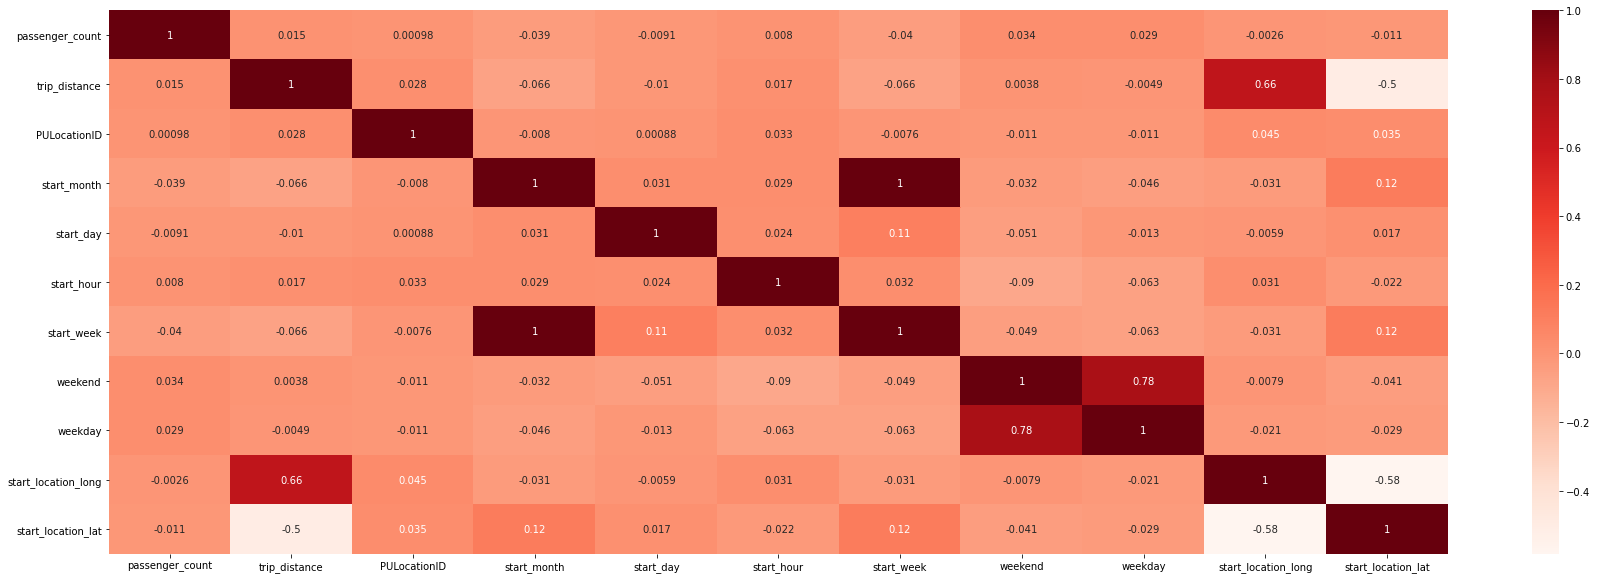

Relevant features:
trip_distance          1.000000
start_location_long    0.662994
start_location_lat     0.499386
Name: trip_distance, dtype: float64


In [4]:
yellowcab.model.correlation_analysis(trip_data, drop_columns=drop, dep_var="trip_distance", figname="corr_trip_distance")

## fare_amount

In [5]:
drop2 = ['tip_amount', 'total_amount', 'payment_type', 'RatecodeID', 
         'PULocationID', 'DOLocationID']

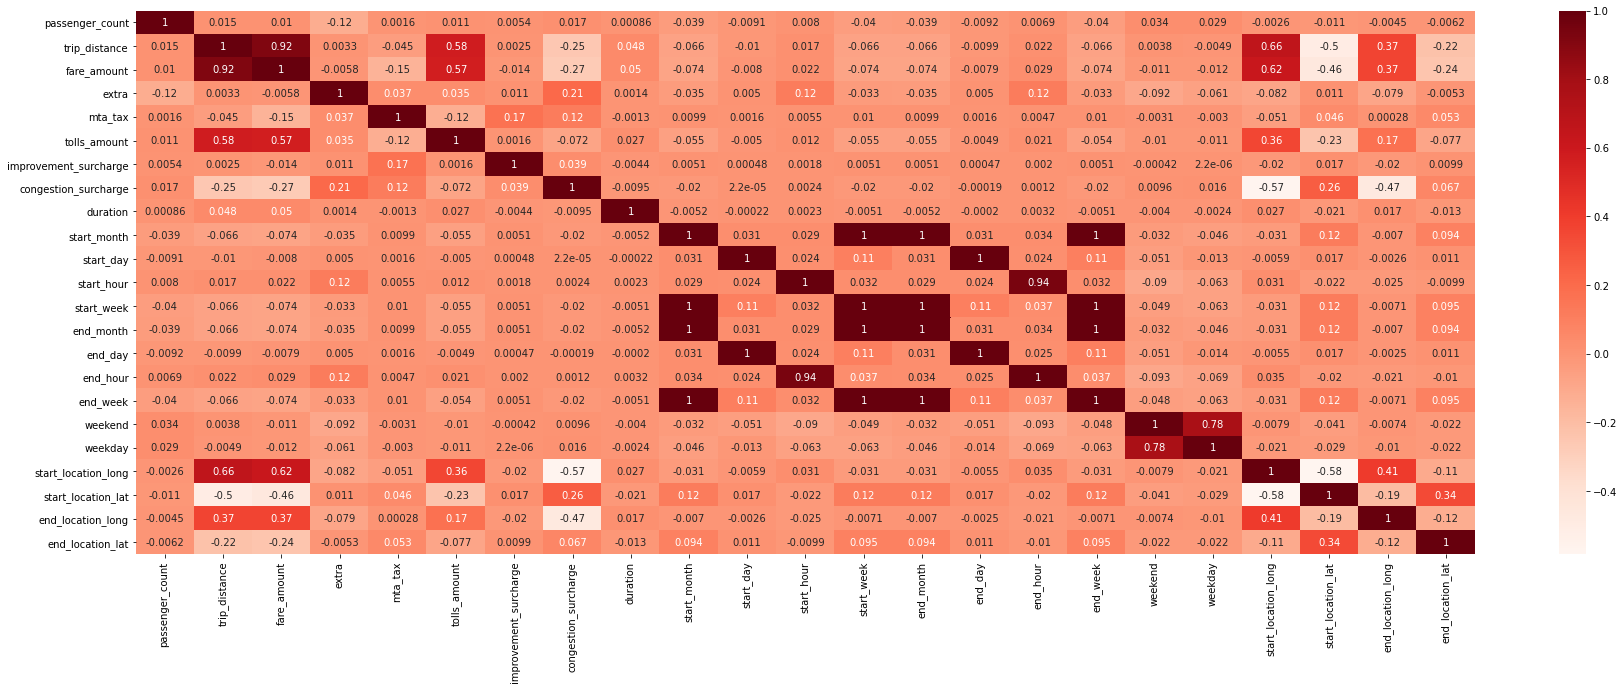

Relevant features:
trip_distance           0.916478
fare_amount             1.000000
tolls_amount            0.570145
congestion_surcharge    0.270809
start_location_long     0.621071
start_location_lat      0.464145
end_location_long       0.365956
end_location_lat        0.242790
Name: fare_amount, dtype: float64


In [6]:
yellowcab.model.correlation_analysis(trip_data, drop_columns=drop2, dep_var="fare_amount", figname="corr_fare_amount")

In [7]:
#If we assume linear regression, one of its assumptions is that the independent variables need to be uncorrelated with each other. 
print(trip_data[["trip_distance","tolls_amount"]].corr())
print(trip_data[["trip_distance","congestion_surcharge"]].corr())
print(trip_data[["trip_distance","start_location_long"]].corr())
print(trip_data[["trip_distance","start_location_lat"]].corr())
print(trip_data[["trip_distance","end_location_long"]].corr())
print(trip_data[["trip_distance","end_location_lat"]].corr())

               trip_distance  tolls_amount
trip_distance        1.00000       0.58176
tolls_amount         0.58176       1.00000
                      trip_distance  congestion_surcharge
trip_distance              1.000000             -0.251178
congestion_surcharge      -0.251178              1.000000
                     trip_distance  start_location_long
trip_distance             1.000000             0.662994
start_location_long       0.662994             1.000000
                    trip_distance  start_location_lat
trip_distance            1.000000           -0.499386
start_location_lat      -0.499386            1.000000
                   trip_distance  end_location_long
trip_distance           1.000000           0.365431
end_location_long       0.365431           1.000000
                  trip_distance  end_location_lat
trip_distance          1.000000         -0.220344
end_location_lat      -0.220344          1.000000


In [8]:
# using corr > 0.5 rule, tolls_amount is highly correlated to trip_distance, hence we would keep only one variable (trip_distance)

# all relevant features in the end: trip_distance, congestion_surcharge, start_location_lat, end_location_long, end_location_lat

## payment_type

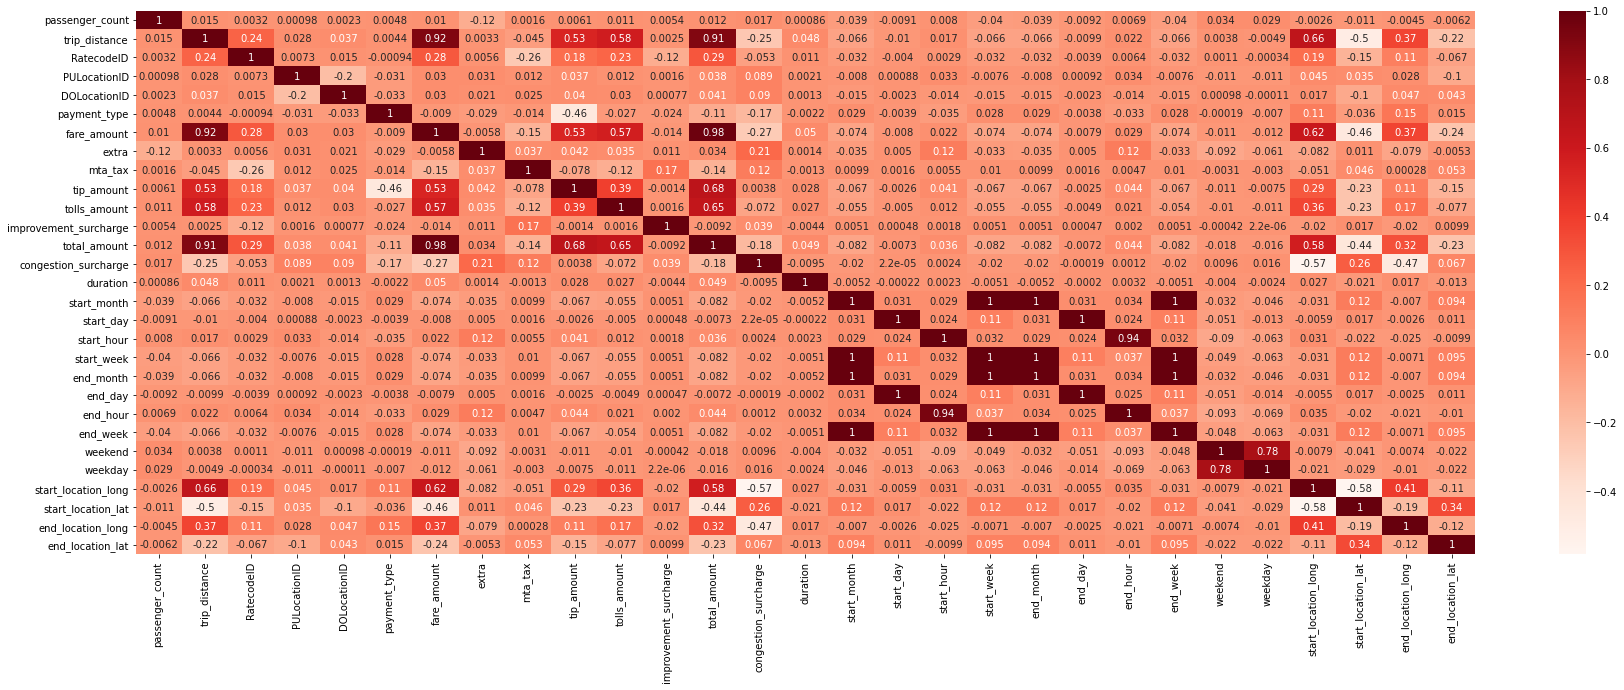

Relevant features:
payment_type    1.000000
tip_amount      0.456852
Name: payment_type, dtype: float64


In [9]:
yellowcab.model.correlation_analysis(trip_data, drop_columns=[], dep_var="payment_type", figname="corr_payment_type")